[[Python] Keras-RLで簡単に強化学習(DQN)を試す](http://qiita.com/inoory/items/e63ade6f21766c7c2393)を参考に、エージェントを作成する。FXの自動取引を行い、利益を出すのが目標。

In [ ]:
import numpy as np
import pandas as pd
import talib
from logging import getLogger, StreamHandler, DEBUG, INFO

from hist_data import HistData
from fx_trade import FXTrade
from deep_fx import DeepFX

Using TensorFlow backend.


In [ ]:
logger = getLogger(__name__)
handler = StreamHandler()
handler.setLevel(INFO)
logger.setLevel(INFO)
logger.addHandler(handler)

In [ ]:
#import imp
#import sys
#del(hist_data)
#from hist_data import HistData
#del(hist_data)
#imp.reload(hist_data)
#imp.reload(sys.modules[hist_data.__module__])
hd = HistData(csv_path = 'historical_data/USDJPY.hst_.csv',
                     begin_date='2010-09-01T00:00:00',
                     end_date='2010-09-07T23:59:59')

In [ ]:
hd.data()
#len(hist_data.data())

,Open,High,Low,Close,Volatility
Date,,,,,
2010-09-01 00:00:00,84.17,84.18,84.14,84.18,13.0
2010-09-01 00:01:00,84.18,84.18,84.14,84.18,11.0
2010-09-01 00:02:00,84.18,84.18,84.14,84.18,14.0
2010-09-01 00:03:00,84.18,84.18,84.15,84.18,8.0
2010-09-01 00:04:00,84.17,84.17,84.14,84.17,13.0
2010-09-01 00:05:00,84.17,84.17,84.14,84.17,6.0
2010-09-01 00:06:00,84.17,84.17,84.12,84.14,18.0
2010-09-01 00:07:00,84.14,84.14,84.12,84.14,13.0
2010-09-01 00:08:00,84.14,84.15,84.12,84.15,9.0


In [ ]:
env = FXTrade(1000000, 0.08, hd, logger=logger)
#env = FXTrade(1000000, 0.08, h, logger=logger)
prepared_model_filename = None #'Keras-RL_DQN_FX_model_meanq1.440944e+06_episode00003.h5'
dfx = DeepFX(env, 'test', prepared_model_filename=prepared_model_filename)

In [ ]:
#import imp
#import sys
#import deep_fx
#from deep_fx import DeepFX
##del(hist_data)
##from deep
##del(hist_data)
#imp.reload(deep_fx)
##imp.reload(sys.modules[deep_fx.__module__])
##reload(deep_fx)

In [ ]:
is_to_train = True
if is_to_train:
    dfx.train(is_for_time_measurement=True)
else:
    dfx.test(1, [EpisodeLogger()])

2010-09-01 00:00:00 84.180000
2010-09-01 00:00:00 84.180000
2010-09-01 00:00:00 84.180000
2010-09-01 00:00:00 84.180000


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 2)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9         
_________________________________________________________________
activation_1 (Activation)    (None, 3)                 0         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
None
17/10/30 01:20:33
Training for 14390 steps ...
Training for 14390 steps ...
_reset START
self._seed: 100000
Start datetime: 2010-09-01T00:00:00.000000000
_reset END
now_datetime: 2010-09-01 00:01:00
len(self.hist_data.data()) - 1: 7140
========== Model Saver output ==============
mean_q value: 0.000000e+00
Step 00002: model improved
  from 0.000000e+00
    to 0.000000e+00, saving model to ./models/Keras-

2010-09-01 00:00:00 84.180000
2010-09-01 00:00:00 84.180000
2010-09-01 00:00:00 84.180000
2010-09-01 00:00:00 84.180000
2010-09-01 00:00:00 84.180000


_reset END
now_datetime: 2010-09-01 00:02:00
len(self.hist_data.data()) - 1: 7140
========== Model Saver output ==============
mean_q value: 0.000000e+00
========== /Model Saver output =============
    14/14390: episode: 5, duration: 0.041s, episode steps: 3, steps per second: 73, episode reward: 495858.817, mean reward: 165286.272 [-669427.455, 1000000.000], mean action: 2.000 [2.000, 2.000], mean observation: 42.090 [0.000, 84.180], loss: --, mean_q: --
    14/14390: episode: 5, duration: 0.042s, episode steps: 3, steps per second: 71, episode reward: 495858.817, mean reward: 165286.272 [-669427.455, 1000000.000], mean action: 2.000 [2.000, 2.000], mean observation: 42.090 [0.000, 84.180], loss: --, mean_q: --
_reset START
self._seed: 100000
Start datetime: 2010-09-01T00:00:00.000000000
_reset END
now_datetime: 2010-09-01 00:02:00
len(self.hist_data.data()) - 1: 7140
========== Model Saver output ==============
mean_q value: 0.000000e+00
========== /Model Saver output =============


2010-09-01 00:00:00 84.180000
2010-09-01 00:00:00 84.180000
2010-09-01 00:00:00 84.180000
2010-09-01 00:00:00 84.180000
2010-09-01 00:00:00 84.180000


now_datetime: 2010-09-01 00:07:00
len(self.hist_data.data()) - 1: 7140
========== Model Saver output ==============
mean_q value: 0.000000e+00
========== /Model Saver output =============
    33/14390: episode: 9, duration: 0.083s, episode steps: 8, steps per second: 97, episode reward: 5497136.935, mean reward: 687142.117 [-668640.921, 1834713.728], mean action: 1.500 [0.000, 2.000], mean observation: 42.082 [0.000, 84.180], loss: --, mean_q: --
    33/14390: episode: 9, duration: 0.084s, episode steps: 8, steps per second: 96, episode reward: 5497136.935, mean reward: 687142.117 [-668640.921, 1834713.728], mean action: 1.500 [0.000, 2.000], mean observation: 42.082 [0.000, 84.180], loss: --, mean_q: --
_reset START
self._seed: 100000
Start datetime: 2010-09-01T00:00:00.000000000
_reset END
now_datetime: 2010-09-01 00:01:00
len(self.hist_data.data()) - 1: 7140
========== Model Saver output ==============
mean_q value: 0.000000e+00
========== /Model Saver output =============
    35/14

2010-09-01 00:00:00 84.180000
2010-09-01 00:00:00 84.180000
2010-09-01 00:00:00 84.180000
2010-09-01 00:00:00 84.180000
2010-09-01 00:00:00 84.180000
2010-09-01 00:00:00 84.180000


now_datetime: 2010-09-01 00:11:00
len(self.hist_data.data()) - 1: 7140
========== Model Saver output ==============
mean_q value: 0.000000e+00
========== /Model Saver output =============
    56/14390: episode: 14, duration: 0.110s, episode steps: 12, steps per second: 109, episode reward: 12837066.593, mean reward: 1069755.549 [-668740.080, 2669427.455], mean action: 1.417 [0.000, 2.000], mean observation: 42.080 [0.000, 84.180], loss: --, mean_q: --
    56/14390: episode: 14, duration: 0.110s, episode steps: 12, steps per second: 109, episode reward: 12837066.593, mean reward: 1069755.549 [-668740.080, 2669427.455], mean action: 1.417 [0.000, 2.000], mean observation: 42.080 [0.000, 84.180], loss: --, mean_q: --
_reset START
self._seed: 100000
Start datetime: 2010-09-01T00:00:00.000000000
_reset END
now_datetime: 2010-09-01 00:01:00
len(self.hist_data.data()) - 1: 7140
========== Model Saver output ==============
mean_q value: 0.000000e+00
========== /Model Saver output =============

2010-09-01 00:00:00 84.180000
2010-09-01 00:00:00 84.180000
2010-09-01 00:00:00 84.180000
2010-09-01 00:00:00 84.180000
2010-09-01 00:00:00 84.180000
2010-09-01 00:00:00 84.180000
2010-09-01 00:00:00 84.180000


now_datetime: 2010-09-01 00:01:00
len(self.hist_data.data()) - 1: 7140
========== Model Saver output ==============
mean_q value: 0.000000e+00
========== /Model Saver output =============
    72/14390: episode: 21, duration: 0.029s, episode steps: 2, steps per second: 68, episode reward: -503946.233, mean reward: -251973.117 [-669329.981, 165383.747], mean action: 2.000 [2.000, 2.000], mean observation: 42.090 [0.000, 84.180], loss: --, mean_q: --
    72/14390: episode: 21, duration: 0.030s, episode steps: 2, steps per second: 67, episode reward: -503946.233, mean reward: -251973.117 [-669329.981, 165383.747], mean action: 2.000 [2.000, 2.000], mean observation: 42.090 [0.000, 84.180], loss: --, mean_q: --
_reset START
self._seed: 100000
Start datetime: 2010-09-01T00:00:00.000000000
_reset END
now_datetime: 2010-09-01 00:01:00
len(self.hist_data.data()) - 1: 7140
========== Model Saver output ==============
mean_q value: 0.000000e+00
========== /Model Saver output =============
    74/

2010-09-01 00:00:00 84.180000
2010-09-01 00:00:00 84.180000
2010-09-01 00:00:00 84.180000
2010-09-01 00:00:00 84.180000
2010-09-01 00:00:00 84.180000
2010-09-01 00:00:00 84.180000
2010-09-01 00:00:00 84.180000
2010-09-01 00:00:00 84.180000
2010-09-01 00:00:00 84.180000


========== Model Saver output ==============
mean_q value: 0.000000e+00
========== /Model Saver output =============
    84/14390: episode: 27, duration: 0.023s, episode steps: 1, steps per second: 43, episode reward: -669329.981, mean reward: -669329.981 [-669329.981, -669329.981], mean action: 2.000 [2.000, 2.000], mean observation: 42.090 [0.000, 84.180], loss: --, mean_q: --
    84/14390: episode: 27, duration: 0.024s, episode steps: 1, steps per second: 42, episode reward: -669329.981, mean reward: -669329.981 [-669329.981, -669329.981], mean action: 2.000 [2.000, 2.000], mean observation: 42.090 [0.000, 84.180], loss: --, mean_q: --
_reset START
self._seed: 100000
Start datetime: 2010-09-01T00:00:00.000000000
_reset END
now_datetime: 2010-09-01 00:00:00
len(self.hist_data.data()) - 1: 7140
========== Model Saver output ==============
mean_q value: 0.000000e+00
========== /Model Saver output =============
    85/14390: episode: 28, duration: 0.023s, episode steps: 1, steps per sec

2010-09-01 00:00:00 84.180000
2010-09-01 00:00:00 84.180000
2010-09-01 00:00:00 84.180000
2010-09-01 00:00:00 84.180000
2010-09-01 00:00:00 84.180000
2010-09-01 00:00:00 84.180000
2010-09-01 00:00:00 84.180000



========== Model Saver output ==============
mean_q value: 0.000000e+00
========== /Model Saver output =============
    94/14390: episode: 36, duration: 0.023s, episode steps: 1, steps per second: 44, episode reward: -669329.981, mean reward: -669329.981 [-669329.981, -669329.981], mean action: 2.000 [2.000, 2.000], mean observation: 42.090 [0.000, 84.180], loss: --, mean_q: --
    94/14390: episode: 36, duration: 0.023s, episode steps: 1, steps per second: 43, episode reward: -669329.981, mean reward: -669329.981 [-669329.981, -669329.981], mean action: 2.000 [2.000, 2.000], mean observation: 42.090 [0.000, 84.180], loss: --, mean_q: --
_reset START
self._seed: 100000
Start datetime: 2010-09-01T00:00:00.000000000
_reset END
now_datetime: 2010-09-01 00:00:00
len(self.hist_data.data()) - 1: 7140
========== Model Saver output ==============
mean_q value: 0.000000e+00
========== /Model Saver output =============
    95/14390: episode: 37, duration: 0.027s, episode steps: 1, steps per se

2010-09-01 00:00:00 84.180000
2010-09-01 00:00:00 84.180000
2010-09-01 00:00:00 84.180000
2010-09-01 00:00:00 84.180000


========== Model Saver output ==============
mean_q value: 0.000000e+00
========== /Model Saver output =============
   101/14390: episode: 43, duration: 0.236s, episode steps: 1, steps per second: 4, episode reward: -669329.981, mean reward: -669329.981 [-669329.981, -669329.981], mean action: 2.000 [2.000, 2.000], mean observation: 42.090 [0.000, 84.180], loss: --, mean_q: --
   101/14390: episode: 43, duration: 0.236s, episode steps: 1, steps per second: 4, episode reward: -669329.981, mean reward: -669329.981 [-669329.981, -669329.981], mean action: 2.000 [2.000, 2.000], mean observation: 42.090 [0.000, 84.180], loss: --, mean_q: --
_reset START
self._seed: 100000
Start datetime: 2010-09-01T00:00:00.000000000
_reset END
now_datetime: 2010-09-01 00:03:00
len(self.hist_data.data()) - 1: 7140
========== Model Saver output ==============
mean_q value: 4.241606e+01
Step 00105: model improved
  from 0.000000e+00
    to 4.241606e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq4.2

2010-09-01 00:00:00 84.180000
2010-09-01 00:00:00 84.180000
2010-09-01 00:00:00 84.180000
2010-09-01 00:00:00 84.180000
2010-09-01 00:00:00 84.180000
2010-09-01 00:00:00 84.180000


========== Model Saver output ==============
mean_q value: 4.174681e+01
========== /Model Saver output =============
   111/14390: episode: 47, duration: 0.037s, episode steps: 1, steps per second: 27, episode reward: -669329.981, mean reward: -669329.981 [-669329.981, -669329.981], mean action: 2.000 [2.000, 2.000], mean observation: 42.090 [0.000, 84.180], loss: 457745268736.000000, mean_q: 41.746815
   111/14390: episode: 47, duration: 0.037s, episode steps: 1, steps per second: 27, episode reward: -669329.981, mean reward: -669329.981 [-669329.981, -669329.981], mean action: 2.000 [2.000, 2.000], mean observation: 42.090 [0.000, 84.180], loss: 457745268736.000000, mean_q: 41.746815
_reset START
self._seed: 100000
Start datetime: 2010-09-01T00:00:00.000000000
_reset END
now_datetime: 2010-09-01 00:00:00
len(self.hist_data.data()) - 1: 7140
========== Model Saver output ==============
mean_q value: 4.162539e+01
========== /Model Saver output =============
   112/14390: episode: 48, d

2010-09-02 00:00:00 84.420000
2010-09-03 00:00:00 84.270000
2010-09-06 00:00:00 84.130000
2010-09-07 00:00:00 84.210000
2010-09-01 00:00:00 84.180000


now_datetime: 2010-09-07 23:58:00
len(self.hist_data.data()) - 1: 7140
========== Model Saver output ==============
mean_q value: 4.717801e+02
Step 07256: model improved
  from 4.241606e+01
    to 4.717801e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq4.717801e+02_episode00052
Save model to ./models/Keras-RL_DQN_FX_model_meanq4.717801e+02_episode00052 has done.
max mean_q value: 4.717801e+02
========== /Model Saver output =============
  7256/14390: episode: 53, duration: 83.614s, episode steps: 7140, steps per second: 85, episode reward: 12806297516100.543, mean reward: 1793599091.891 [165383.747, 3596149400.677], mean action: 1.003 [0.000, 2.000], mean observation: 42.103 [0.000, 85.200], loss: 695257142529097728.000000, mean_q: 471.780121
  7256/14390: episode: 53, duration: 83.629s, episode steps: 7140, steps per second: 85, episode reward: 12806297516100.543, mean reward: 1793599091.891 [165383.747, 3596149400.677], mean action: 1.003 [0.000, 2.000], mean observation: 4

2010-09-02 00:00:00 84.420000
2010-09-03 00:00:00 84.270000
2010-09-06 00:00:00 84.130000
2010-09-07 00:00:00 84.210000


done, took 169.000 seconds
done, took 169.001 seconds
elapsed_time:169.0363507270813[sec]
17/10/30 01:23:22


<IPython.core.display.Javascript object>


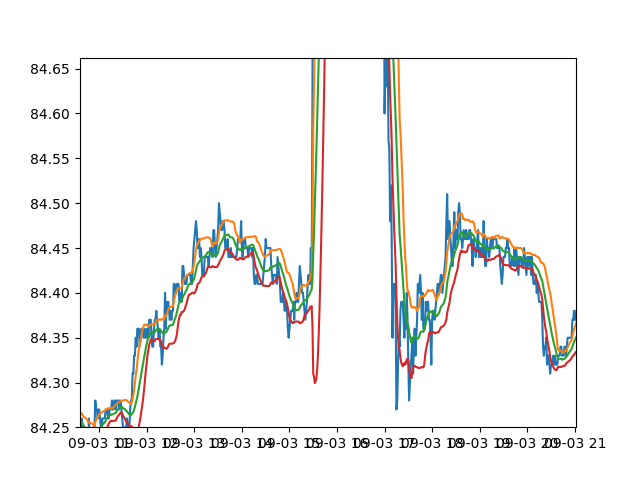

[[<matplotlib.lines.Line2D at 0x7ff911f28358>],

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
data = hd.data()['Close']
x = data.index
y = data.values
sd = 1
upper, middle, lower = talib.BBANDS(data.values, timeperiod=20, matype=talib.MA_Type.SMA, nbdevup=sd, nbdevdn=sd)
[plt.plot(x, val) for val in [y, upper, middle, lower]]

In [ ]:
data.values

## References

- [Deep Q-LearningでFXしてみた](http://recruit.gmo.jp/engineer/jisedai/blog/deep-q-learning/)
- [slide](https://www.slideshare.net/JunichiroKatsuta/deep-qlearningfx)

In [ ]:
hd.data().ix[hd.data().idxmin()].index.rank()

AttributeError: 'DatetimeIndex' object has no attribute 'rank'